### Steps involved in model building:
1. Splitting the data into train and test
2. Preprocessing 
3. Fitting a model
4. Evaluating the performance

In [6]:
import pandas as pd
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor


In [3]:
df = pd.read_excel('./Data/2410_iPAGE_SoilData_cleaned.xlsx')
df.columns

Index(['Area', 'soil group', 'Land class', 'knit (surface)', 'pH', 'SOC (%)',
       'Nitrogen N (%)', 'Potassium K (meq/100)', 'Phosphorus P (ug/g)',
       'Sulfur S (ug/g)', 'Boron B (ug/g)', 'Zinc Zn (ug/g)'],
      dtype='object')

#### Inputs to the model : 
       'Area', 'soil group', 'Land class', 'knit (surface)', 'pH', ,
       'Nitrogen N (%)', 'Potassium K (meq/100)', 'Phosphorus P (ug/g)',
       'Sulfur S (ug/g)'
#### Outputs from the model : 
        'SOC (%)','Boron B (ug/g)', 'Zinc Zn (ug/g)'

In [9]:
## Train test split

X = df[['Area', 'soil group', 'Land class', 'knit (surface)', 'pH',
       'Nitrogen N (%)', 'Potassium K (meq/100)', 'Phosphorus P (ug/g)',
       'Sulfur S (ug/g)']]
y = df[['SOC (%)','Boron B (ug/g)', 'Zinc Zn (ug/g)']]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)



(494, 9) (494, 3)
(124, 9) (124, 3)


#### Preprocessing

In [ ]:
### Preprocessing step


In [17]:
X_train.iloc[:,4:].head()

,pH,Nitrogen N (%),Potassium K (meq/100),Phosphorus P (ug/g),Sulfur S (ug/g)
531,4.4,0.0800,0.33,185.0,12.0
364,5.5,0.0032,0.51,60.0,17.0
177,5.7,0.1100,0.09,4.4,9.8
593,5.6,0.1400,0.14,11.0,20.0
199,5.2,0.1900,0.15,4.3,24.5


#### Baseline model :
In order to have an understanding of the performance of our model, it is important to have a baseline model. Here I am taking the average of the values in the training set as the prediction.
ie, the prediction for Boron is the average of the Boron values in the training set

In [46]:
# creating a prediction dataframe with the mean values from training data
y_predict_baseline = pd.DataFrame().reindex_like(y_test)
y_predict_baseline.iloc[0]=y_train.mean()
y_predict_baseline = y_predict_baseline.ffill()
print(mean_absolute_error(y_test,y_predict_baseline))

0.5208686604849593


#### Random forest regressor

In [49]:
# A random forest regressor trained on only the numeric columns of the training data
model = RandomForestRegressor().fit(X=X_train.iloc[:,4:],y=y_train)
y_predict = model.predict(X_test.iloc[:,4:])
print('Mean Absolute Error : ',mean_absolute_error(y_test,y_predict))

MAE:  0.4488058333333334


In [51]:
pd.Series(data=model.feature_importances_,index=X_train.columns[4:])

pH                       0.095454
Nitrogen N (%)           0.301528
Potassium K (meq/100)    0.235972
Phosphorus P (ug/g)      0.238445
Sulfur S (ug/g)          0.128601
dtype: float64

In [19]:
# A random forest regressor trained on only the numeric columns of the training data

Text(0, 0.5, 'y_predict')

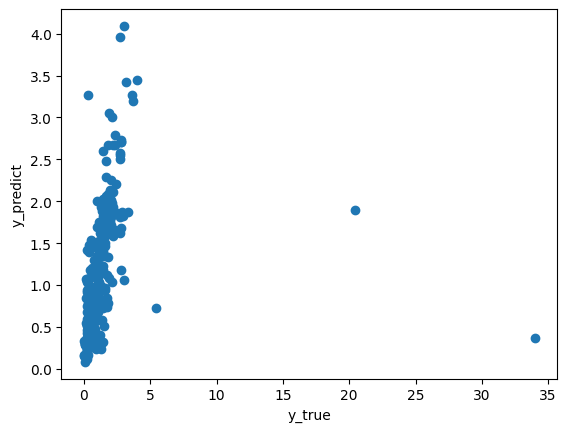

In [27]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_predict)
plt.xlabel('y_true')
plt.ylabel('y_predict')